In [27]:
import importlib.util
spec = importlib.util.spec_from_file_location("BoundaryLayerToolbox", "/Users/claudiopierard/VC/BoundaryLayerToolbox.py")
blt = importlib.util.module_from_spec(spec)
spec.loader.exec_module(blt)

In [28]:
import matplotlib
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy as spy
import scipy.io as sio
import scipy.optimize as optimization
import scipy.interpolate as interpolate
from netCDF4 import Dataset
import os

from IPython import display
from matplotlib import animation
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [29]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
from matplotlib.pyplot import cm 

In [30]:
estados_path = "/Users/claudiopierard/vc/datos/EstadosMX/"
estados_names = blt.nombres_estados
estados = {}
for i in estados_names:
    reg = blt.region()
    path = estados_path + i + ".xy"
    blt.read_region(reg, path)
    estados[i] = reg

In [31]:
def promedios_mensuales_wrf(PBLH, ix, iy):
    month = []
    month_std = []

    for h in range(0, 24):

        h_mean = np.mean(PBLH[:,h, ix, iy])
        h_std = np.std(PBLH[:,h, ix, iy])
        month.append(h_mean)
        month_std.append(h_std)

    month = np.array(month)
    month_std = np.array(month_std)

    return  [month, month_std]

In [32]:
file = h5py.File('/Volumes/BUFFALO_SOLDIER/datos_VC/04/apr_24.h5', 'r')

In [33]:
with h5py.File('/Volumes/BUFFALO_SOLDIER/datos_VC/04/apr_24.h5', 'r') as hdf:
    ls = list(hdf.keys())
    print('List of dataset in file:', ls)


List of dataset in file: ['dates_24', 'pblh_24h', 'u_mean_24h', 'vc_24h']


In [34]:
file = h5py.File('/Volumes/BUFFALO_SOLDIER/datos_VC/04/apr_24.h5', 'r')
pblh_24 = file.get('pblh_24h')
pblh_48 = file.get('pblh_48h')
vc_24 = file.get('vc_24h')

In [35]:
pblh_24 = np.array(pblh_24)
vc_24 = np.array(vc_24)

In [36]:
pblh_24.shape

(29, 24, 102, 128)

In [37]:
xlat = np.loadtxt('/Users/claudiopierard/VC/datos/xlat_d02_interpolado.txt')
xlong = np.loadtxt('/Users/claudiopierard/VC/datos/xlong_d02_interpolado.txt')

In [38]:
xlat.shape

(102, 128)

In [39]:
xlat_cca, xlong_cca =19.3262,  -99.1761

In [40]:
xlat_jqro, xlong_jqro = 20.7030, -100.4473

In [42]:
xx , yy = blt.near_coord_loc(xlong, xlat, xlong_jqro, xlat_jqro)

In [43]:
promedios_mensuales_wrf(pblh_24, xx, yy)

[array([  130.82348245,    98.85224651,    86.46724885,    83.40320469,
           77.25279657,    55.23760894,    63.61651565,    56.23903136,
          194.0081382 ,   436.30094489,   823.51225018,  1261.95212318,
         1709.79256676,  2108.89269599,  2411.10374714,  2543.82718632,
         2643.57351158,  2202.61680235,  1690.53542354,   665.41139353,
          300.81754619,   214.49397462,   188.2751964 ,   154.24672219]),
 array([  88.62436573,   75.17036277,   78.89444947,   75.19506136,
         105.13561749,   55.85359743,   95.06062172,   80.76159869,
          93.9362164 ,  133.83581584,  271.72485665,  333.57176364,
         392.83425654,  375.6828044 ,  386.70872711,  522.93120274,
         558.58815105,  789.81951055,  847.56978162,  543.16516995,
         226.37863069,  105.44024442,   89.82240132,   77.28189377])]

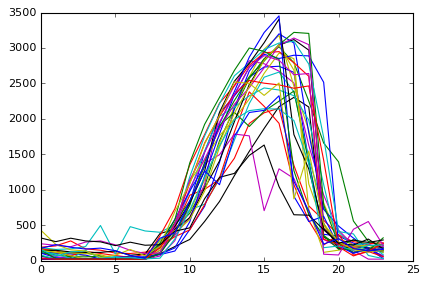

In [44]:
for i in range(0, len(pblh_24[:,0,0,0])):
    plt.plot(pblh_24[i,:, xx, yy])

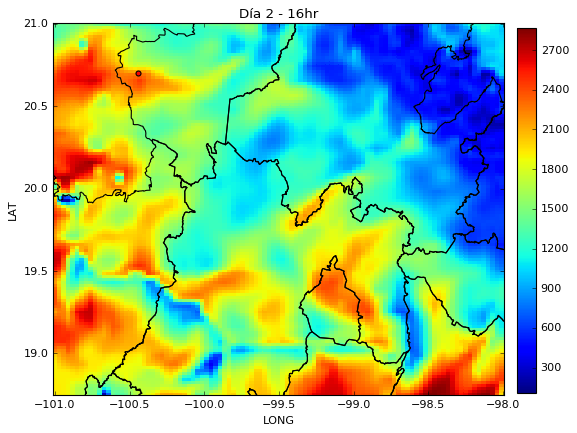

In [45]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.set_xlim(xlong[:,0].min(), xlong[:,0].max())
ax.set_ylim(xlat[0,:].min(), xlat[0,:].max())

d = 2
t = 16

im = ax.pcolormesh(xlong, xlat, pblh_24[d, t,:,:])
ax.scatter(xlong[xx,yy], xlat[xx,yy], c = 'r')
#ax.scatter(xlong_jqro,xlat_jqro, c = 'b')

for name in estados_names:
    ax.plot(estados[name].lon, estados[name].lat, c='k')

fig.subplots_adjust(right=0.83)
cbar_ax = fig.add_axes([0.85, 0.13, 0.03, 0.76])
fig.colorbar(im, cax=cbar_ax)

ax.set_xlabel('LONG')
ax.set_ylabel('LAT')
ax.set_title('Día ' + str(d) +' - ' + str(t) + 'hr')

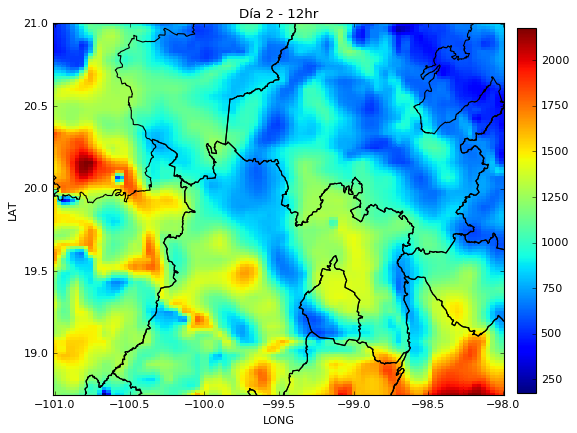

In [46]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.set_xlim(xlong[:,0].min(), xlong[:,0].max())
ax.set_ylim(xlat[0,:].min(), xlat[0,:].max())

d = 2
t = 12

im = ax.pcolormesh(xlong, xlat, pblh_24[d, t,:,:])
#ax.scatter(-98.198993, 19.012326, c = 'r')

for name in estados_names:
    ax.plot(estados[name].lon, estados[name].lat, c='k')

fig.subplots_adjust(right=0.83)
cbar_ax = fig.add_axes([0.85, 0.13, 0.03, 0.76])
fig.colorbar(im, cax=cbar_ax)

ax.set_xlabel('LONG')
ax.set_ylabel('LAT')
ax.set_title('Día ' + str(d) +' - ' + str(t) + 'hr')

In [47]:
xlong[:,0]

array([-101.01330566, -100.98339187, -100.95347807, -100.92356427,
       -100.89365047, -100.86373667, -100.83382287, -100.80390908,
       -100.77399528, -100.74408148, -100.71416768, -100.68425388,
       -100.65434008, -100.62442628, -100.59451249, -100.56459869,
       -100.53468489, -100.50477109, -100.47485729, -100.44494349,
       -100.4150297 , -100.3851159 , -100.3552021 , -100.3252883 ,
       -100.2953745 , -100.2654607 , -100.23554691, -100.20563311,
       -100.17571931, -100.14580551, -100.11589171, -100.08597791,
       -100.05606411, -100.02615032,  -99.99623652,  -99.96632272,
        -99.93640892,  -99.90649512,  -99.87658132,  -99.84666753,
        -99.81675373,  -99.78683993,  -99.75692613,  -99.72701233,
        -99.69709853,  -99.66718474,  -99.63727094,  -99.60735714,
        -99.57744334,  -99.54752954,  -99.51761574,  -99.48770194,
        -99.45778815,  -99.42787435,  -99.39796055,  -99.36804675,
        -99.33813295,  -99.30821915,  -99.27830536,  -99.24839

# ceilometro

In [48]:
path2ceilo = "/Users/claudiopierard/VC/datos/ceilometro/2015_local/"

In [49]:
month_dt, month_raw, month_filt = blt.read_ceilometro_month(path2ceilo + 'apr' + "_2015_local.dat")

In [50]:
month_raw

array([ 1730.,  1890.,  2000., ...,  2190.,  2170.,  1910.])

In [51]:
type(month_raw[0])

numpy.float64

In [52]:
def search_hours(hh, DT):
    indexes = []
    for i in range(0, len(DT)):
        if DT[i].hour == hh and DT[i].minute == 0:
            indexes.append(i)
    return indexes

In [53]:
search_hours(0, month_dt)

[0,
 144,
 288,
 432,
 576,
 714,
 858,
 1002,
 1146,
 1290,
 1434,
 1578,
 1722,
 1866,
 2010,
 2154,
 2298,
 2442,
 2586,
 2730,
 2874,
 3018,
 3162,
 3306,
 3450,
 3594]

In [54]:
def promedios_mensuales_hora(hh, DT, RAW):

    index_array = search_hours(hh, DT)

    mensuales = []
    mensuales_std = []
    mensuales_hora = []
    mensuales_hora_std = []

    for i in index_array:
        mensuales.append(RAW[i])
        intervalo_hora = []

        for j in range(-3, 4):
            intervalo_hora.append(RAW[i + j])
        
        mean_hora = np.mean(np.array(intervalo_hora))
        std_hora = np.std(intervalo_hora)
        mensuales_hora.append(mean_hora)
        mensuales_hora_std.append(std_hora)


    mean_mesuales = np.mean(mensuales)
    std_mensuales = np.std(mensuales)
    mean_mensuales_hora = np.mean(mensuales_hora)
    std_mensuales_hora = np.mean(mensuales_hora_std)

    return mean_mesuales, std_mensuales, mean_mensuales_hora, std_mensuales_hora

In [55]:
promedios_mensuales_hora(23, month_dt, month_raw)

(1509.4000000000001, 479.1874789683053, 1425.9142857142858, 313.50937002193581)

In [56]:
def promedios_mensuales(DT, RAW):
    mes = []
    mes_std = []
    mes_inteval = []
    mes_inteval_std = []
    for h in range(0, 24):
        mean_mm, std_mm, mean_mm_intv, std_mm_intv = promedios_mesuales_hora(h, DT, RAW)
        mes.append(mean_mm)
        mes_std.append(std_mm)
        mes_inteval.append(mean_mm_intv)
        mes_inteval_std.append(std_mm_intv)

    mes = np.array(mes)
    mes_std = np.array(mes_std)
    mes_inteval = np.array(mes_inteval)
    mes_inteval_std = np.array(mes_inteval_std)
    return  [mes, mes_std, mes_inteval, mes_inteval_std]

# Ceilometro

In [58]:
import pandas as pd

In [67]:
file_path_24 = "/Volumes/BUFFALO_SOLDIER/datos_VC/11/nov_24.h5"
file_path_48 = "/Volumes/BUFFALO_SOLDIER/datos_VC/11/nov_48.h5"

In [68]:
file_24 = h5py.File(file_path_24, 'r')
file_48 = h5py.File(file_path_48, 'r')
pblh_24 = np.array(file_24.get('pblh_24h'))
pblh_48 = np.array(file_48.get('pblh_48h'))

In [92]:
BEG = pd.date_range('2015-11-01 00:00:00', '2015-11-05 23:00:00', freq='1H')
ENDD = pd.date_range('2015-11-07 00:00:00', '2015-11-18 23:00:00', freq='1H')
BEG = BEG.union(ENDD)
ENDD = pd.date_range('2015-11-20 00:00:00', '2015-11-20 23:00:00', freq='1H')
BEG = BEG.union(ENDD)
ENDD = pd.date_range('2015-11-22 00:00:00', '2015-11-30 23:00:00', freq='1H')
month_t_range = BEG.union(ENDD)

In [93]:
month_t_range.shape

(648,)

In [88]:
27*24

648

In [91]:
24*28

672

In [85]:
month_t_range

DatetimeIndex(['2015-11-01 00:00:00', '2015-11-01 01:00:00',
               '2015-11-01 02:00:00', '2015-11-01 03:00:00',
               '2015-11-01 04:00:00', '2015-11-01 05:00:00',
               '2015-11-01 06:00:00', '2015-11-01 07:00:00',
               '2015-11-01 08:00:00', '2015-11-01 09:00:00',
               ...
               '2015-11-30 14:00:00', '2015-11-30 15:00:00',
               '2015-11-30 16:00:00', '2015-11-30 17:00:00',
               '2015-11-30 18:00:00', '2015-11-30 19:00:00',
               '2015-11-30 20:00:00', '2015-11-30 21:00:00',
               '2015-11-30 22:00:00', '2015-11-30 23:00:00'],
              dtype='datetime64[ns]', length=672, freq=None)

In [71]:
np.reshape

<function numpy.core.fromnumeric.reshape>

In [72]:
pblh_24.shape

(27, 24, 102, 128)

In [73]:
27*24

648

In [74]:
prueba = np.reshape(pblh_24,(27*24, 102, 128))

In [75]:
pblh_24.shape

(27, 24, 102, 128)

In [76]:
xx

19

In [79]:
def wrf2dataframe(PBLH_24, PBLH_48, month_t_range, ix, iy):
    """
        wrf2dataframe(PBLH_24, PBLH_48, month_t_range):
        - PBLH_24 : salida del wrf 24 para una estación.
        - PBLH_48 : salida del wrf 48 para una estación.
        - month_t_range : rango temoral de los datos PBLH_24 y PBLH_48.
    """
    month_pblh_24 = []
    month_pblh_48 = []
    for i in range(0,len(PBLH_24[:,0,ix,iy])):
        for j in range(0,24):
            month_pblh_24.append(PBLH_24[i,j,ix,iy])
            month_pblh_48.append(PBLH_48[i,j,ix,iy])

    month_wrf_df = pd.DataFrame({'PBLH_24' : pd.Series(month_pblh_24, index=month_t_range),
                               'PBLH_48' : pd.Series(month_pblh_48, index=month_t_range)})
    return month_wrf_df

In [95]:
all_df =wrf2dataframe(pblh_24, pblh_48, month_t_range, xx, yy)

In [98]:
all_df['2015-11-19']

,PBLH_24,PBLH_48


------------------
# probar tablas

In [100]:
np.loadtxt("/Users/claudiopierard/VC/datos/promedios/cca/apr_promedios_cca.dat")

array([[ 1315.   ,   569.664,  1229.56 ,   281.481,   170.362,   143.251,
          245.258,   166.644],
       [ 1230.962,   553.11 ,  1151.978,   271.752,   140.765,   128.443,
          204.255,   154.937],
       [ 1045.   ,   509.868,  1019.89 ,   197.094,   127.254,   135.436,
          163.129,   136.048],
       [  975.192,   544.18 ,   924.203,   115.563,   114.081,   115.63 ,
          146.747,   138.121],
       [  905.   ,   478.395,   787.83 ,   264.441,    94.905,   107.551,
          138.915,   142.13 ],
       [  685.192,   416.636,   706.346,   145.371,   103.497,   116.708,
          129.585,   134.543],
       [  689.808,   423.957,   731.126,   201.79 ,    91.606,   111.669,
          115.044,   128.142],
       [  844.231,   437.784,   788.709,   215.038,    96.718,   110.694,
          119.667,   136.345],
       [  706.538,   478.306,   707.72 ,   220.494,   305.918,    97.568,
          387.276,    95.833],
       [  913.846,   568.284,   850.934,   209.571,   5